## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**. 
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [1]:
# importar librerías
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv')

In [3]:
# mostrar las primeras 5 filas de traffic
traffic.head(5)

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [4]:
# mostrar las primeras 5 filas de eco
eco.head(5)

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato tienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [5]:
# Examinar la estructura de traffic
traffic.info()
print()
traffic.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTCWeekAgo` son de tipo object, se deben corregir a datetime.
- ...

In [6]:
# Examinar la estructura de eco
eco.info()
print()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB



,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, `PM2.5 (μg/m³)`, `Population (M)` son de tipo object, se deben corregir a float64
- ... 

### Creando copias para trabajar con dichas copias.

In [7]:
# copia de traffic
tr = traffic.copy()
display(tr.info())
display(tr.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

None

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


In [8]:
# Copia de eco
ec = eco.copy()
display(ec.info())
display(ec.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


None

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"


### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [9]:
# Estandarizar los nombres de las columnas de traffic
tr_dic_names = {'Country':'country',
                'City':'city',
                'UpdateTimeUTC':'update_time_utc',
                'JamsDelay':'jams_delay',
                'TrafficIndexLive':'traffic_index_live',
                'JamsLengthInKms':'jams_length_kms',
                'JamsCount':'jams_count',
                'TrafficIndexWeekAgo':'traffic_index_week_ago',
                'UpdateTimeUTCWeekAgo':'update_time_utc_week_ago',
                'TravelTimeLivePer10KmsMins':'travel_time_live_per_10kms_mins',
                'TravelTimeHistoricPer10KmsMins':'travel_time_hist_per_10kms_mins',
                'MinsDelay':'mins_delay'
}

tr.rename(columns = tr_dic_names, inplace = True)

# verificar cambios
tr.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins',
       'mins_delay'],
      dtype='object')

In [10]:
# Estandarizar los nombres de las columnas de eco
ec_dic_names = {'Year':'year',
                'City':'city',
                'Country':'country',
                'City GDP/capita':'city_gdp_capita',
                'Unemployment %':'unemployment_pct',
                'PM2.5 (μg/m³)':'pm25_ug_m3',
                'Population (M)':'population_m'
}

ec.rename(columns = ec_dic_names, inplace = True)

# verificar cambios
ec.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm25_ug_m3', 'population_m'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [11]:
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
tr['update_time_utc'] = pd.to_datetime(tr['update_time_utc'], errors = 'coerce')
tr['update_time_utc_week_ago'] = pd.to_datetime(tr['update_time_utc_week_ago'], errors = 'coerce')
# Verificar cambios de fecha con .info()
tr.info()
print()
tr.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   country                          1004464 non-null  object        
 1   city                             1004464 non-null  object        
 2   update_time_utc                  1004464 non-null  datetime64[ns]
 3   jams_delay                       1004464 non-null  float64       
 4   traffic_index_live               1004464 non-null  float64       
 5   jams_length_kms                  1004464 non-null  float64       
 6   jams_count                       1004464 non-null  float64       
 7   traffic_index_week_ago           1004464 non-null  float64       
 8   update_time_utc_week_ago         1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10kms_mins  1004464 non-null  float64       
 10  travel_time_hist_per_10kms_min

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


In [12]:
# Limpia separadores y convierte columnas numéricas en eco
ec['city_gdp_capita'] = ec['city_gdp_capita'].astype(str).str.replace('.', '').str.replace(',', '.').str.strip().astype(float)
ec['unemployment_pct'] = ec['unemployment_pct'].astype(str).str.replace('%', '').str.replace(',', '.').str.strip().astype(float)
ec['pm25_ug_m3'] = ec['pm25_ug_m3'].astype(str).str.replace('%', '').str.replace(',', '.').str.strip().astype(float)
ec['population_m'] = ec['population_m'].astype(str).str.replace('%', '').str.replace(',', '.').str.strip().astype(float)

# Calcula la población total en unidades absolutas (Multiplica * 1000000)
ec['population'] = ec['population_m'] * 1000000

# verificar el cambio
ec.info()
print()
ec.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm25_ug_m3        30 non-null     float64
 6   population_m      30 non-null     float64
 7   population        30 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.0+ KB



,year,city,country,city_gdp_capita,unemployment_pct,pm25_ug_m3,population_m,population
0,2023,buenos-aires,Argentina,15782.0,6.2,15.2,15.3,15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,29.5,22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,19.1,13.6,13600000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [13]:
# Extraer el año de las fechas en update_time_utc
tr['year'] = tr['update_time_utc'].dt.year

# Verificar cambio
tr.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025


In [14]:
# Filtra los registros del año 2024
traffic_2024 = tr[tr['year'] == 2024].copy()
eco_2024 = ec[ec['year'] == 2024].copy()

# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())
display(traffic_2024.info())
display(eco_2024.info())

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm25_ug_m3,population_m,population
15,2024,buenos-aires,Argentina,18117.0,7.2,14.5,15.4,15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,28.0,22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,18.4,13.7,13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,12.8,4.8,4800000.0
19,2024,salvador,Brazil,8899.0,12.4,15.2,3.9,3900000.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 886779 entries, 302 to 1004463
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   country                          886779 non-null  object        
 1   city                             886779 non-null  object        
 2   update_time_utc                  886779 non-null  datetime64[ns]
 3   jams_delay                       886779 non-null  float64       
 4   traffic_index_live               886779 non-null  float64       
 5   jams_length_kms                  886779 non-null  float64       
 6   jams_count                       886779 non-null  float64       
 7   traffic_index_week_ago           886779 non-null  float64       
 8   update_time_utc_week_ago         886779 non-null  datetime64[ns]
 9   travel_time_live_per_10kms_mins  886779 non-null  float64       
 10  travel_time_hist_per_10kms_mins  886779 n

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 15 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              15 non-null     int64  
 1   city              15 non-null     object 
 2   country           15 non-null     object 
 3   city_gdp_capita   15 non-null     float64
 4   unemployment_pct  15 non-null     float64
 5   pm25_ug_m3        15 non-null     float64
 6   population_m      15 non-null     float64
 7   population        15 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.1+ KB


None


---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [15]:
# Calcular los  promedios de trafico por ciudad, país y año
traffic_city_year_2024 = traffic_2024.groupby(['city', 'country', 'year']).agg({
    'jams_delay': 'mean',
    'traffic_index_live': 'mean',
    'jams_length_kms': 'mean',
    'jams_count': 'mean',
    'mins_delay': 'mean',
    'travel_time_live_per_10kms_mins': 'mean',
    'travel_time_hist_per_10kms_mins': 'mean'
}).reset_index()

# Mostrar resultado
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

In [16]:
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False).head(20)

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
321,sao-paulo,BRA,2024,1729.189270,26.877932,238.419896,431.470460,1.129026,20.801836,19.672810
156,istanbul,TUR,2024,1660.789019,45.614786,245.686252,411.145698,2.463699,19.982495,17.518796
159,jakarta,IDN,2024,1379.037135,30.419242,215.228820,295.492817,1.193300,18.098409,16.905109
268,paris,FRA,2024,1320.746822,29.313446,265.865975,324.405534,1.170884,17.658980,16.488097
201,los-angeles,USA,2024,1277.210458,30.446623,341.053551,321.732026,0.790893,13.429048,12.638155


La ciudad con el mayor tiempo promedio de tráfico es 'mexico-city'


---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [21]:
# Seleccionar columnas clave de tráfico y economía
left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_kms','jams_count','mins_delay',
             'travel_time_live_per_10kms_mins','travel_time_hist_per_10kms_mins']

right_cols = ['city','year','city_gdp_capita','unemployment_pct','pm25_ug_m3','population_m']

# Usar .copy() para crear los dos nuevos datasets reducidos
traffic_2024_small = traffic_city_year_2024[left_cols].copy()
eco_2024_small = eco_2024[right_cols].copy()

# Unir datasets
merged = pd.merge(traffic_2024_small, eco_2024_small, on=['city', 'year'], how='inner')

# Mostrar las primeras 5 filas
tr.head()

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238,2025
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016,2025



---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

In [ ]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
# crea tu gráfico

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.show()


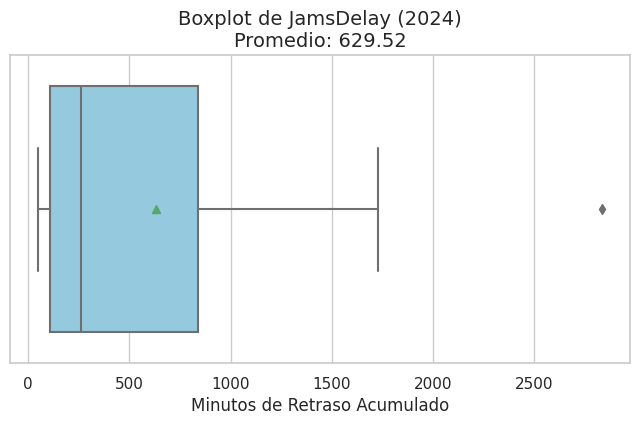

In [34]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
sns.set_theme(style="whitegrid")

# Boxplot
plt.figure(figsize=(8, 4))

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
sns.boxplot(x=merged['jams_delay'], showmeans=True, color='skyblue')

plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}', fontsize=14)
plt.xlabel('Minutos de Retraso Acumulado', fontsize=12)
plt.show()

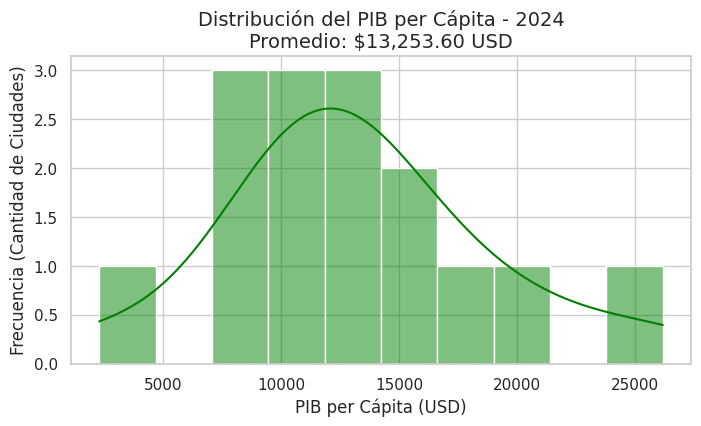

In [35]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)
plt.figure(figsize=(8, 4))

# Obtener promedio para el título
mean_gdp = merged['city_gdp_capita'].mean()

# Crear histograma con curva de densidad (kde)
sns.histplot(merged['city_gdp_capita'], bins=10, kde=True, color='green')

plt.title(f'Distribución del PIB per Cápita - 2024\nPromedio: ${mean_gdp:,.2f} USD', fontsize=14)
plt.xlabel('PIB per Cápita (USD)', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Ciudades)', fontsize=12)
plt.show()

In [ ]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
#merged.plot( ... , y=['jams_delay', 'city_gdp_capita'])

plt.show()

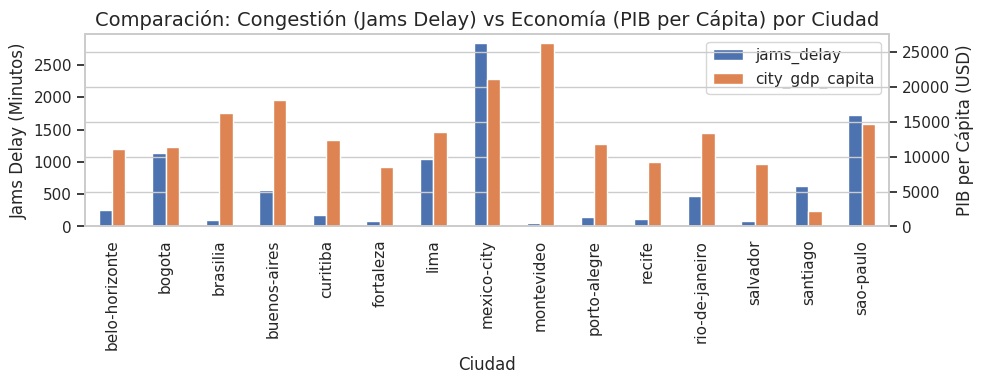

In [36]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
#merged.plot( ... , y=['jams_delay', 'city_gdp_capita'])
# secondary_y=True porque las escalas suelen ser muy diferentes 
# (GDP en miles vs Delay en cientos/decenas)

ax = merged.plot(
    x='city', 
    y=['jams_delay', 'city_gdp_capita'], 
    kind='bar', 
    figsize=(10, 4),
    secondary_y='city_gdp_capita',  # Eje derecho para el PIB para facilitar la comparación
    mark_right=False
)

plt.title('Comparación: Congestión (Jams Delay) vs Economía (PIB per Cápita) por Ciudad', fontsize=14)
ax.set_ylabel('Jams Delay (Minutos)', fontsize=12)
ax.right_ax.set_ylabel('PIB per Cápita (USD)', fontsize=12)
ax.set_xlabel('Ciudad', fontsize=12)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

* ¿Las ciudades con mayor PIB per cápita también presentan más congestión?

* ¿O sucede lo contrario, o no existe una relación clara?

Escribe tus comentarios:

No existe una relación lineal perfecta, pero se observa una tendencia general positiva en las grandes metrópolis.

La actividad económica intensa atrae densidad poblacional y vehículos, saturando la infraestructura. El éxito económico aquí trae consigo el "costo" del tráfico.

Hay excepciones, factores como la planificación urbana (caso Brasilia), el tamaño de la población (Montevideo es mucho más pequeña que Sao Paulo) o sistemas de transporte eficientes pueden desacoplar el crecimiento económico de la congestión.
- Una metrópoli indica que la riqueza y tráfico están relacionados.
- Una ciudad pequeña y planificada indica que se puede tener alto PIB sin sufrir de tráfico.


---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [37]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)

Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información. 


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

# 🧾 Resumen ejecutivo (plantilla)

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
- Responde la pregunta central del análisis: ¿qué relación existe entre la movilidad urbana (congestión, tiempos de viaje) y la productividad económica (PIB per cápita)?
- Explica brevemente las variables clave utilizadas y su relevancia para la toma de decisiones.

**Cobertura de datos:**  
- Especifica los años analizados, número de ciudades y países incluidos.

**Metodología (alto nivel):**  
- Describe los procesos principales: limpieza de datos (formatos, estandarización de columnas).
- Explica la agregación por ciudad–año y el uso de una unión INNER para integrar tráfico y economía.
- Menciona las validaciones visuales empleadas (distribuciones, outliers, tendencias generales).

**Hallazgos iniciales:**  
- Resume los patrones más importantes entre índices de tráfico y PIB per cápita.
- Destaca anomalías u outliers que podrían requerir revisión adicional o un análisis más profundo.

**Recomendaciones**  
Aterriza los hallazgos en acciones: ciudades prioritarias, necesidad de validar fuentes, requerimiento de análisis adicionales, o propuestas de inversión.

- ¿Qué ciudad : Bogotá, Lima o Buenos Aires o alguna otra en particular, muestra la mayor correlación significativa entre altos niveles de congestión vehicular y bajos indicadores de productividad económica, sugiriendo ser una ciudad prioritaria para inversión en infraestructura de transporte?


# 🧾 Resumen ejecutivo

**Contexto, Metodología y Alcance:**  
- El análisis abarcó 15 ciudades principales de América Latina durante el año 2024, integrando variables de movilidad (TomTom) y economía (OECD). Se aplicó un proceso riguroso de limpieza que incluyó la estandarización de columnas a formato snake_case (ej. jams_delay, city_gdp_capita), conversión de fechas. Para la consolidación, se agregaron los datos diarios mediante promedios anuales (.groupby) y se integraron ambas fuentes con una unión tipo INNER JOIN utilizando city y year como claves, asegurando la consistencia dimensional del dataset. Se validaron las distribuciones mediante histogramas y boxplots, identificando una media de retraso de ~630 minutos y valores atípicos significativos.

**Hallazgos Principales: Patrones y Anomalías:**  
- El análisis visual revela que no existe una correlación lineal simple, sino tres comportamientos distintos. Primero, el "Efecto Megaciudad" (Ciudad de México y Sao Paulo), donde el alto PIB per cápita convive con niveles extremos de congestión (jams_delay > 1700 min), sugiriendo que la saturación es un subproducto de su dinamismo económico. Segundo, el "Modelo Eficiente" representado por Montevideo, que ostenta el PIB per cápita más alto del grupo ($26k aprox) con una congestión mínima (50 min aprox), demostrando que la riqueza no obliga al tráfico. Tercero, el grupo de "Baja Eficiencia", donde la congestión es desproporcionadamente alta para el nivel de ingresos generado.

**Respuesta Estratégica: Ciudad Prioritaria:**  
- Respondiendo a la pregunta central, Bogotá es la ciudad que muestra la relación más crítica entre alta congestión y menor productividad relativa.
Según los datos, Bogotá presenta un retraso acumulado muy alto (1,141 minutos aprox, el tercero más alto del estudio) pero un PIB per cápita moderado-bajo ($11,442 aprox), inferior al de Lima y muy por debajo de las otras ciudades con tráfico similar (CDMX o Sao Paulo). Esto indica una falla sistémica en la infraestructura: la ciudad pierde productividad atrapada en el tráfico sin generar la riqueza compensatoria de las grandes metrópolis, convirtiéndola en el candidato prioritario para inversión urgente en transporte masivo.

**Recomendaciones y Siguientes Pasos:**  
- **Priorizar Bogotá y Lima:** Ambas ciudades requieren intervención inmediata en movilidad (Metro/BRT) para desbloquear su potencial económico.
- **Validación de Datos (Santiago):** Se detectó una anomalía en el dato de PIB de Santiago de Chile ($2,277 aprox), el cual es sospechosamente bajo para la realidad del país; se recomienda auditar la fuente original antes de tomar decisiones sobre esta ciudad específica.
- **Benchmarking con Montevideo:** Estudiar las políticas de planificación urbana de Montevideo para entender cómo mantiene altos ingresos con mínima fricción vehicular.
